# **Project Name**    -
This project aims to **predict delivery times** for **e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method**.

The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.

# **Business Use Cases**
**Enhanced Delivery Logistics:**
Predict delivery times to improve customer satisfaction and optimize delivery schedules.

**Dynamic Traffic and Weather Adjustments:**
Adjust delivery estimates based on current traffic and weather conditions.

**Agent Performance Evaluation:**
Evaluate agent efficiency and identify areas for training or improvement.
Operational Efficiency:
Optimize resource allocation for deliveries by analyzing trends and performance metrics.



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Venkatesh I


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [55]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [56]:
# Load Dataset
df = pd.read_csv('/content/amazon_delivery (1).csv')

### Dataset First View

In [57]:
# Dataset First Look
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


**Dataset Explanation:**

**Order_ID:** Unique identifier for each order.

**Agent_Age:** Age of the delivery agent.

**Agent_Rating:** Rating of the delivery agent.

**Store_Latitude/Longitude:** Geographic location of the store.

**Drop_Latitude/Longitude:** Geographic location of the delivery address.

**Order_Date/Order_Time:** Date and time when the order was placed.

**Pickup_Time:** Time when the delivery agent picked up the order.

**Weather:** Weather conditions during delivery.

**Traffic:** Traffic conditions during delivery.

***Vehicle:** Mode of transportation used for delivery.

***Area:** Type of delivery area (Urban/Metropolitan).

**Delivery_Time:** Target variable representing the actual time taken for delivery (in hours).

**Category:** Category of the product being delivered.


### Dataset Rows & Columns count

In [58]:
# Dataset Rows & Columns count
df.shape


(43739, 16)

### Dataset Information

In [59]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


### Check Unique Values for each variable.

In [102]:
# Investigate all the elements whithin each Feature

for column in df:
    unique_vals = np.unique(df[column].astype(str))
    nr_values = len(unique_vals)
    if nr_values <= 45:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Order_ID :38969
The number of values for feature Agent_Age :20 -- ['20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33'
 '34' '35' '36' '37' '38' '39']
The number of values for feature Agent_Rating :9 -- ['4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5.0']
The number of values for feature Store_Latitude :389
The number of values for feature Store_Longitude :389
The number of values for feature Drop_Latitude :4339
The number of values for feature Drop_Longitude :4339
The number of values for feature Order_Date :44 -- ['2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14' '2022-02-15'
 '2022-02-16' '2022-02-17' '2022-02-18' '2022-03-01' '2022-03-02'
 '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06' '2022-03-07'
 '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11' '2022-03-12'
 '2022-03-13' '2022-03-14' '2022-03-15' '2022-03-16' '2022-03-17'
 '2022-03-18' '2022-03-19' '2022-03-20' '2022-03-21' '2022-03-23'
 '2022-03-24' '2022-03-25' '2

#### Duplicate Values

In [61]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [62]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


<Axes: ylabel='Count'>

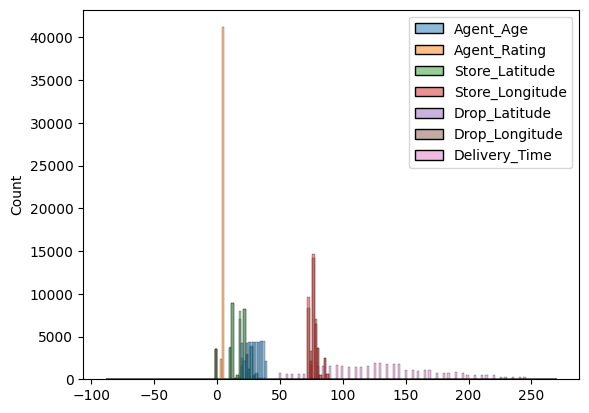

In [63]:
# Visualizing the missing values
sns.histplot(data=df)


<Axes: >

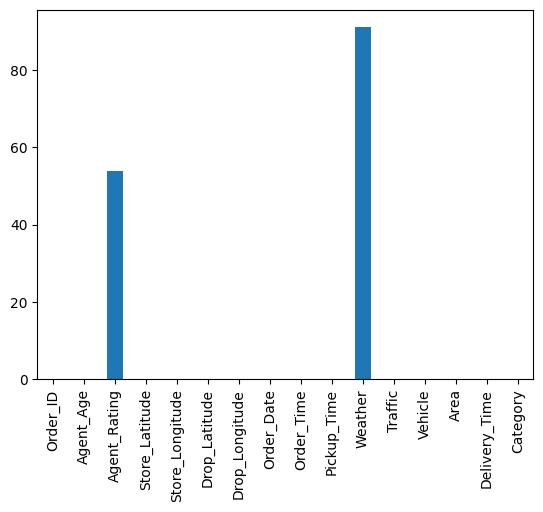

In [64]:
df.isnull().sum().plot.bar()

### What did you know about your dataset?

Imputations to be performed on the features in our dataset.

1. Weather- (91) Agent_Rating (54) :Missing values to be imputed
2. Order_Date/Time /Pickup_Time: Should be in Datetime format and delivery time is given in minutes so we got rename this features delivery_min to add order time + pickup time + delivery_min to get the final delivery time for prediction.
3. Nan Values- Weather, Traffic, Agent_rating
4. Categorical variables imputations:   Weather(7-Unique variables), Traffic(5-Unique variables), Vehicle(4-Unique variables), Area(4-Unique variables), Category(16-Unique variables)

## ***2. Understanding Your Variables***

In [65]:
# Dataset Columns
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [66]:
# Dataset Describe
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


### Variables Description

Answer Here

In [67]:
# Check Unique Values for each variable.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [68]:
for col in ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']:
    df[col] = df[col].astype(str).str.strip().str.lower()  # standardize casing and strip whitespace
    df[col] = df[col].replace(['nan', 'Nan', '', np.nan], df[col].mode()[0])  # fill with mode

# Optionally, reformat to title case for presentation/analysis
for col in ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']:
    df[col] = df[col].str.capitalize()


In [69]:
# Standardize and clean the time columns
df['Order_Time'] = df['Order_Time'].astype(str).str.strip().str.lower()
df['Pickup_Time'] = df['Pickup_Time'].astype(str).str.strip().str.lower()

# Fix any lingering 'nan:00:00' values in both time columns
df['Order_Time'] = df['Order_Time'].replace(['nan', 'nan:00:00', np.nan], '00:00:00')
df['Pickup_Time'] = df['Pickup_Time'].replace(['nan', 'nan:00:00', np.nan], '00:00:00')


# Ensure time is of hh:mm:ss format
df['Order_Time'] = df['Order_Time'].apply(lambda x: x if len(x.split(':')) == 3 else x + ':00')
df['Pickup_Time'] = df['Pickup_Time'].apply(lambda x: x if len(x.split(':')) == 3 else x + ':00')


In [70]:
print(df['Order_Time'].unique())
print(df['Pickup_Time'].unique())


['11:30:00' '19:45:00' '08:30:00' '18:00:00' '13:30:00' '21:20:00'
 '19:15:00' '17:25:00' '20:55:00' '21:55:00' '14:55:00' '17:30:00'
 '09:20:00' '19:50:00' '20:25:00' '20:30:00' '20:40:00' '21:15:00'
 '20:20:00' '22:30:00' '08:15:00' '19:30:00' '12:25:00' '18:35:00'
 '20:35:00' '23:20:00' '23:35:00' '22:35:00' '23:25:00' '13:35:00'
 '21:35:00' '18:55:00' '14:15:00' '11:00:00' '09:45:00' '08:40:00'
 '23:00:00' '19:10:00' '10:55:00' '21:40:00' '19:00:00' '16:45:00'
 '15:10:00' '22:45:00' '22:10:00' '20:45:00' '22:50:00' '17:55:00'
 '09:25:00' '20:15:00' '22:25:00' '22:40:00' '23:50:00' '15:25:00'
 '10:20:00' '10:40:00' '15:55:00' '20:10:00' '12:10:00' '15:30:00'
 '10:35:00' '21:10:00' '20:50:00' '12:35:00' '21:00:00' '23:40:00'
 '18:15:00' '18:20:00' '11:45:00' '12:45:00' '23:30:00' '10:50:00'
 '21:25:00' '10:10:00' '17:50:00' '22:20:00' '12:40:00' '23:55:00'
 '10:25:00' '08:45:00' '23:45:00' '19:55:00' '22:15:00' '23:10:00'
 '09:15:00' '18:25:00' '18:45:00' '16:50:00' '00:00:00' '14:20

In [71]:
# Combine date and time columns into single strings
df['Order_DateTime'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Order_Time'], dayfirst=True)
df['Pickup_DateTime'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Pickup_Time'], dayfirst=True)


- .astype(str) ensures the date is a simple string, works regardless of its type.

- pd.to_datetime() automatically detects the date format when passed a string like "YYYY-MM-DD HH:MM:SS" or "YYYY-MM-DD HH:MM".

In [72]:
print(df[['Order_Date', 'Order_Time', 'Pickup_Time','Order_DateTime','Pickup_DateTime']].head(10))


   Order_Date Order_Time Pickup_Time      Order_DateTime     Pickup_DateTime
0  2022-03-19   11:30:00    11:45:00 2022-03-19 11:30:00 2022-03-19 11:45:00
1  2022-03-25   19:45:00    19:50:00 2022-03-25 19:45:00 2022-03-25 19:50:00
2  2022-03-19   08:30:00    08:45:00 2022-03-19 08:30:00 2022-03-19 08:45:00
3  2022-04-05   18:00:00    18:10:00 2022-04-05 18:00:00 2022-04-05 18:10:00
4  2022-03-26   13:30:00    13:45:00 2022-03-26 13:30:00 2022-03-26 13:45:00
5  2022-03-11   21:20:00    21:30:00 2022-03-11 21:20:00 2022-03-11 21:30:00
6  2022-03-04   19:15:00    19:30:00 2022-03-04 19:15:00 2022-03-04 19:30:00
7  2022-03-14   17:25:00    17:30:00 2022-03-14 17:25:00 2022-03-14 17:30:00
8  2022-03-20   20:55:00    21:05:00 2022-03-20 20:55:00 2022-03-20 21:05:00
9  2022-02-12   21:55:00    22:10:00 2022-02-12 21:55:00 2022-02-12 22:10:00


In [73]:
# Impute missing values: Agent_Rating (median), Weather and Traffic (mode)
df['Agent_Rating'].fillna(df['Agent_Rating'].median(), inplace=True)
df['Weather'].replace('Nan', np.nan, inplace=True)
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df['Traffic'].replace('NaN', np.nan, inplace=True)
df['Traffic'].fillna(df['Traffic'].mode()[0], inplace=True)


https://en.wikipedia.org/wiki/Haversine_formula - Haversine to calculate distance between store and drop location using lat and longitude

In [74]:
from numpy import radians, sin, cos, sqrt, arctan2
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * arctan2(sqrt(a), sqrt(1-a))
    return R * c

df['Distance_KM'] = df.apply(lambda row: haversine(
    row['Store_Latitude'], row['Store_Longitude'], row['Drop_Latitude'], row['Drop_Longitude']), axis=1)


In [75]:
# Add order hour, day of week, rush hour indicator
df['Order_Hour'] = df['Order_DateTime'].dt.hour
df['Order_DayOfWeek'] = df['Order_DateTime'].dt.dayofweek
df['Is_Rush_Hour'] = df['Order_Hour'].apply(lambda x: 1 if (8 <= x <= 10) or (17 <= x <= 20) else 0)
# Consistency check for timestamps
print('Pickup before order:', (df['Pickup_DateTime'] < df['Order_DateTime']).sum())


Pickup before order: 828


In [76]:
# Calculate Delivery_DateTime as Pickup_DateTime plus Delivery_Time (in minutes)
df['Delivery_DateTime'] = df['Pickup_DateTime'] + pd.to_timedelta(df['Delivery_Time'], unit='m')

# (Optional) preview a few rows to confirm
print(df[['Pickup_DateTime', 'Delivery_Time', 'Delivery_DateTime']].head())


      Pickup_DateTime  Delivery_Time   Delivery_DateTime
0 2022-03-19 11:45:00            120 2022-03-19 13:45:00
1 2022-03-25 19:50:00            165 2022-03-25 22:35:00
2 2022-03-19 08:45:00            130 2022-03-19 10:55:00
3 2022-04-05 18:10:00            105 2022-04-05 19:55:00
4 2022-03-26 13:45:00            150 2022-03-26 16:15:00


In [77]:
df.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,0
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order_ID           43739 non-null  object        
 1   Agent_Age          43739 non-null  int64         
 2   Agent_Rating       43739 non-null  float64       
 3   Store_Latitude     43739 non-null  float64       
 4   Store_Longitude    43739 non-null  float64       
 5   Drop_Latitude      43739 non-null  float64       
 6   Drop_Longitude     43739 non-null  float64       
 7   Order_Date         43739 non-null  object        
 8   Order_Time         43739 non-null  object        
 9   Pickup_Time        43739 non-null  object        
 10  Weather            43739 non-null  object        
 11  Traffic            43739 non-null  object        
 12  Vehicle            43739 non-null  object        
 13  Area               43739 non-null  object        
 14  Delive

In [79]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Area,Delivery_Time,Category,Order_DateTime,Pickup_DateTime,Distance_KM,Order_Hour,Order_DayOfWeek,Is_Rush_Hour,Delivery_DateTime
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,Urban,120,Clothing,2022-03-19 11:30:00,2022-03-19 11:45:00,3.025149,11,5,0,2022-03-19 13:45:00
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Metropolitian,165,Electronics,2022-03-25 19:45:00,2022-03-25 19:50:00,20.183530,19,4,1,2022-03-25 22:35:00
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Urban,130,Sports,2022-03-19 08:30:00,2022-03-19 08:45:00,1.552758,8,5,1,2022-03-19 10:55:00
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Metropolitian,105,Cosmetics,2022-04-05 18:00:00,2022-04-05 18:10:00,7.790401,18,1,1,2022-04-05 19:55:00
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,Metropolitian,150,Toys,2022-03-26 13:30:00,2022-03-26 13:45:00,6.210138,13,5,0,2022-03-26 16:15:00


In [80]:
df.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,0
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [81]:
# Summary stats for numeric data
print(df.describe())

          Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count  43739.000000  43739.000000    43739.000000     43739.000000   
mean      29.567137      4.633862       17.210960        70.661177   
min       15.000000      1.000000      -30.902872       -88.366217   
25%       25.000000      4.500000       12.933298        73.170283   
50%       30.000000      4.700000       18.551440        75.898497   
75%       35.000000      4.900000       22.732225        78.045359   
max       50.000000      6.000000       30.914057        88.433452   
std        5.815155      0.334518        7.764225        21.475005   

       Drop_Latitude  Drop_Longitude  Delivery_Time  \
count   43739.000000    43739.000000   43739.000000   
mean       17.459031       70.821842     124.905645   
min         0.010000        0.010000      10.000000   
25%        12.985996       73.280000      90.000000   
50%        18.633626       76.002574     125.000000   
75%        22.785049       78.104095   

Most statistical libraries (and pandas) do not compute standard deviation for absolute timestamps, hence they return NaN.

Weather
Fog           7531
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64
Traffic
Low       15090
Jam       13725
Medium    10628
High       4296
Name: count, dtype: int64
Vehicle
Motorcycle    25527
Scooter       14639
Van            3558
Bicycle          15
Name: count, dtype: int64
Area
Metropolitian    32698
Urban             9751
Other             1138
Semi-urban         152
Name: count, dtype: int64
Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name: count, dtype: int64


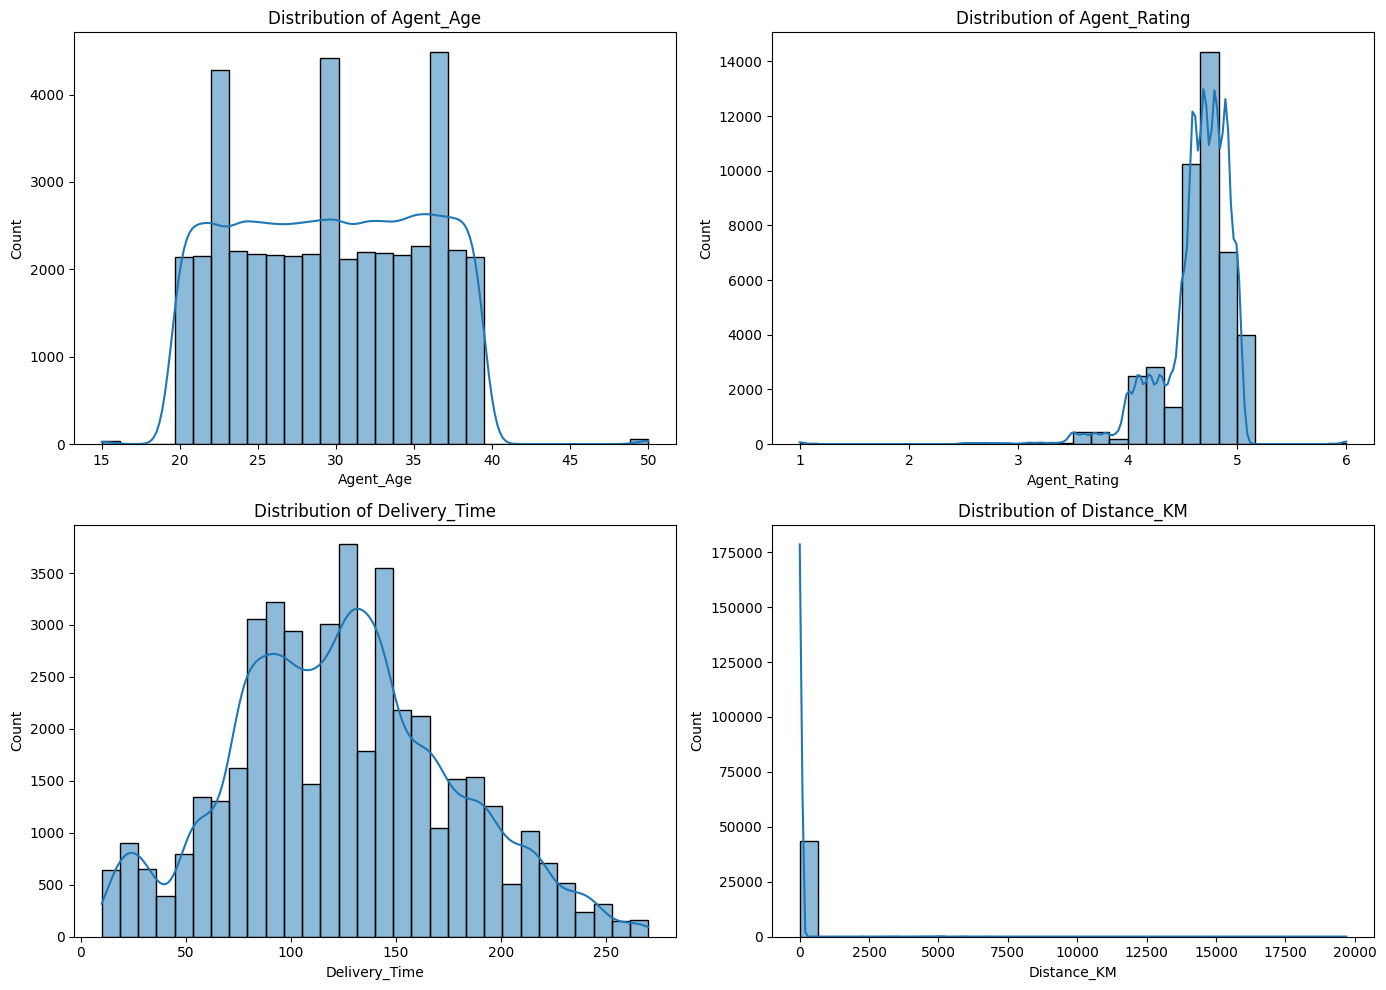

In [82]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns



# Counts for categorical
for col in ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']:
    print(df[col].value_counts())

# Histograms
numeric_cols = ['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Distance_KM']
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



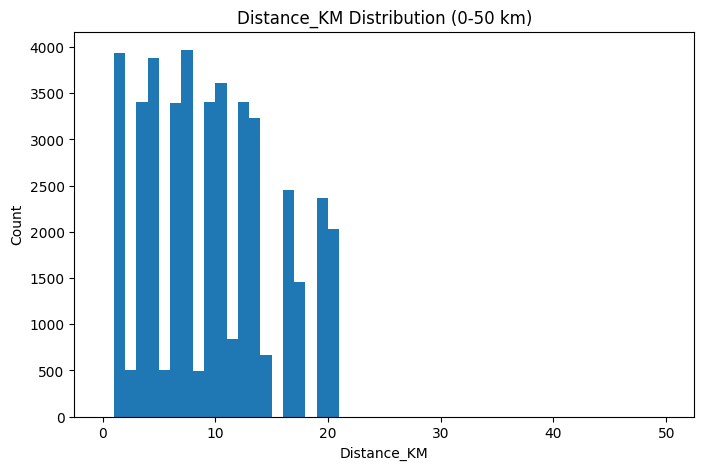

In [83]:
import matplotlib.pyplot as plt

# Plot only the most relevant range (e.g., 0 to 1000 km)
plt.figure(figsize=(8,5))
plt.hist(df['Distance_KM'], bins=50, range=(0,50))
plt.title('Distance_KM Distribution (0-50 km)')
plt.xlabel('Distance_KM')
plt.ylabel('Count')
plt.show()


**Categorical Feature Insights**

- Weather: All categories are well represented with ~7000-7500 occurrences each, suggesting balanced samples with no missing categories.

- Traffic: Most deliveries occurred with 'Low' or 'Jam' traffic (~15k and 13.7k), while 'High' and 'Medium' are less common. All codes seem valid, but class imbalance could influence models.

- Vehicle: 'Motorcycle' and 'Scooter' dominate deliveries. 'Van' is minor; 'Bicycle' is extremely rare (15 records), which may be dropped or grouped into 'Other' for encoding.

- Area: 'Metropolitian' is the overwhelming majority (>32k), 'Urban' is sizeable, but 'Semi-urban' and 'Other' have very few records with possible business importance or may be considered outliers.

- Category: Very well balanced across all 16 product categories—suitable for modeling and fairness, with no dominant group.

- Numerical Feature Insights (from Histograms)
Agent_Age: Relatively uniform distribution.

- Agent_Rating: Clustered around 4.5–5 with a spike at 6.0 (impossible, should be treated as an outlier) and some low outliers (1.0).

- Delivery_Time: Appears normally distributed but with long tails; check for both short and long delivery time outliers.

- Distance_KM: Most records have lower distances, but the histogram shows extreme right-skew with outliers >20,000 km (implausible for a delivery).

Box Plot to determine the outliers

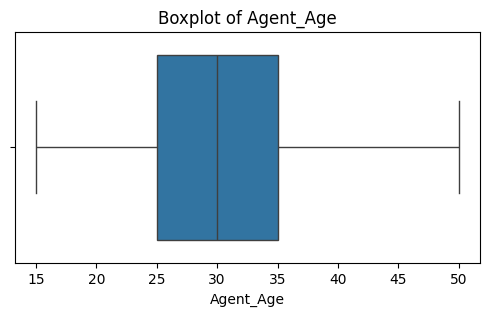

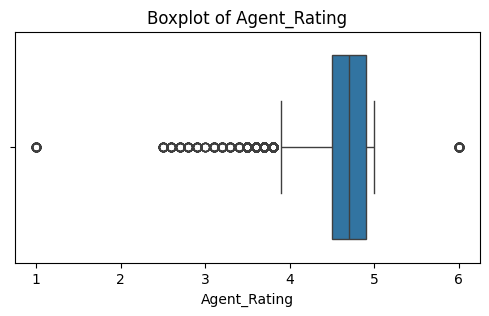

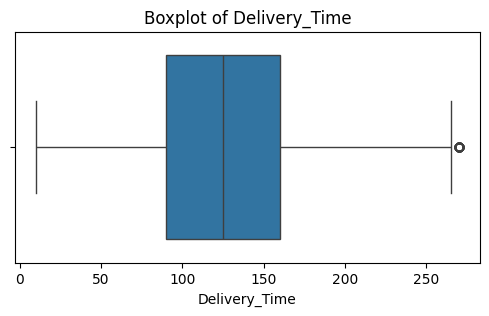

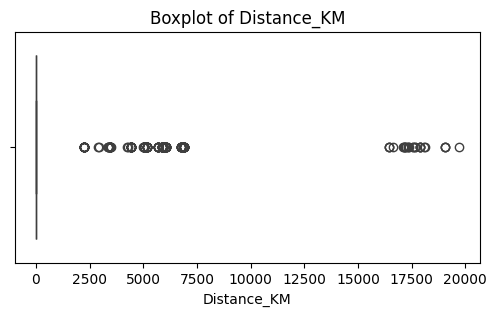

In [84]:
# Box plots for outlier inspection
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

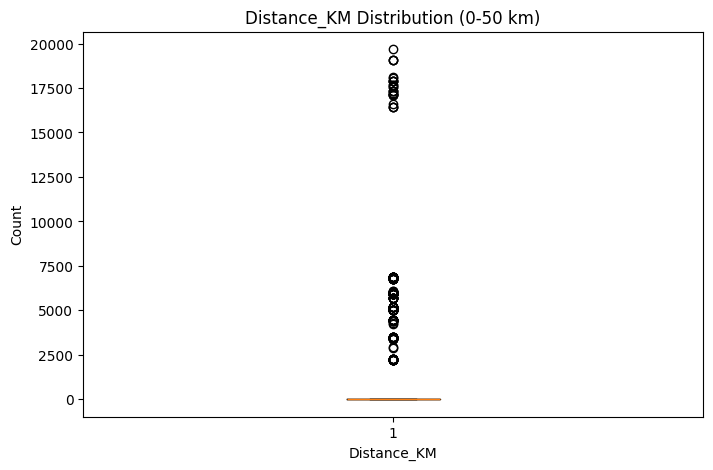

In [85]:
import matplotlib.pyplot as plt

# Plot only the most relevant range (e.g., 0 to 50 km)
plt.figure(figsize=(8,5))
plt.boxplot(x=df['Distance_KM'], )
plt.title('Distance_KM Distribution (0-50 km)')
plt.xlabel('Distance_KM')
plt.ylabel('Count')
plt.show()


Delivery_Time & Agent_Age
Both appear to be well-bounded with mild spread; most values fall within normal operational ranges. Delivery_Time does have fatter tails.

Distance_KM
Shows significant presence of outliers—long tail with values far outside typical delivery radii, confirming the need to cap, investigate, or remove extreme values before modeling.

Agent_Rating
Mainly tightly packed at higher ratings, with a few lower outliers and any values above 5 in raw data requiring investigation or capping.

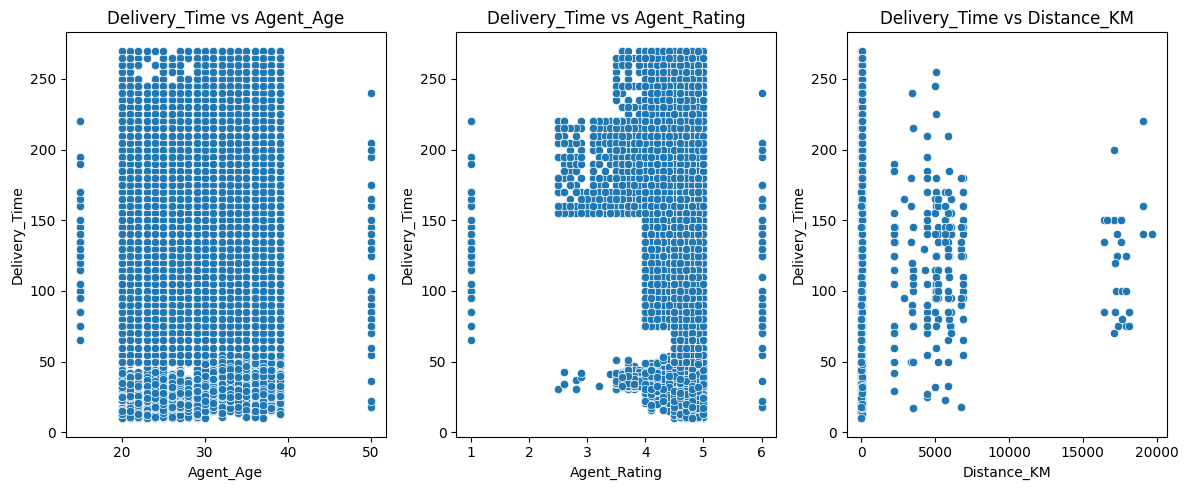

In [86]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(['Agent_Age', 'Agent_Rating', 'Distance_KM'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df['Delivery_Time'])
    plt.title(f'Delivery_Time vs {col}')
plt.tight_layout()
plt.show()


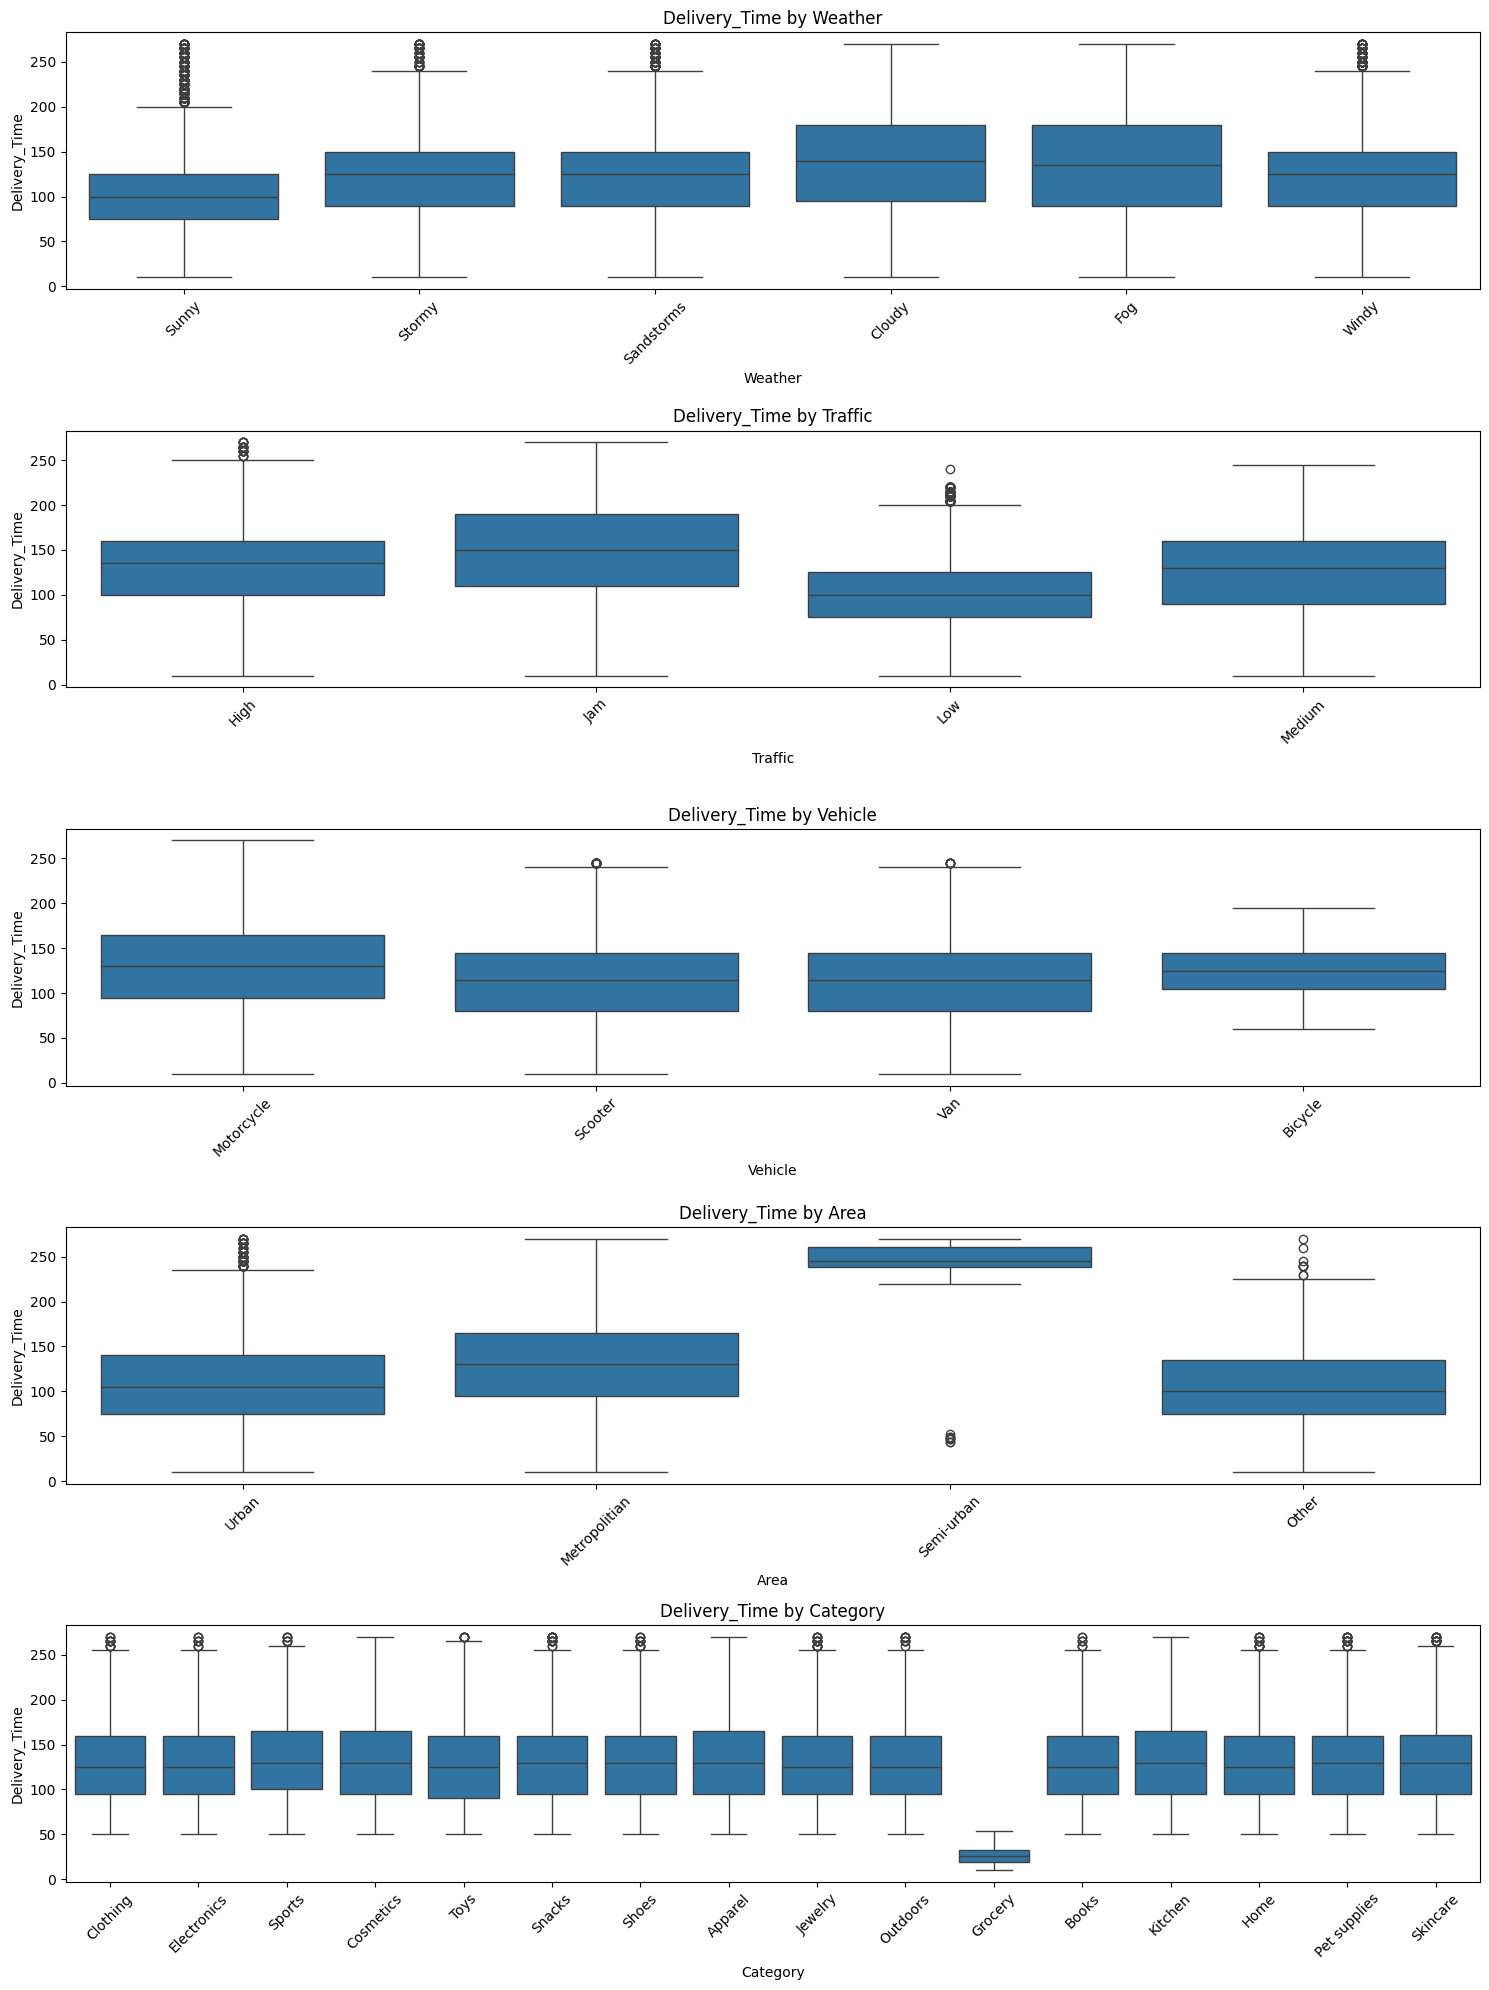

In [87]:
cat_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.boxplot(x=df[col], y=df['Delivery_Time'])
    plt.title(f'Delivery_Time by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


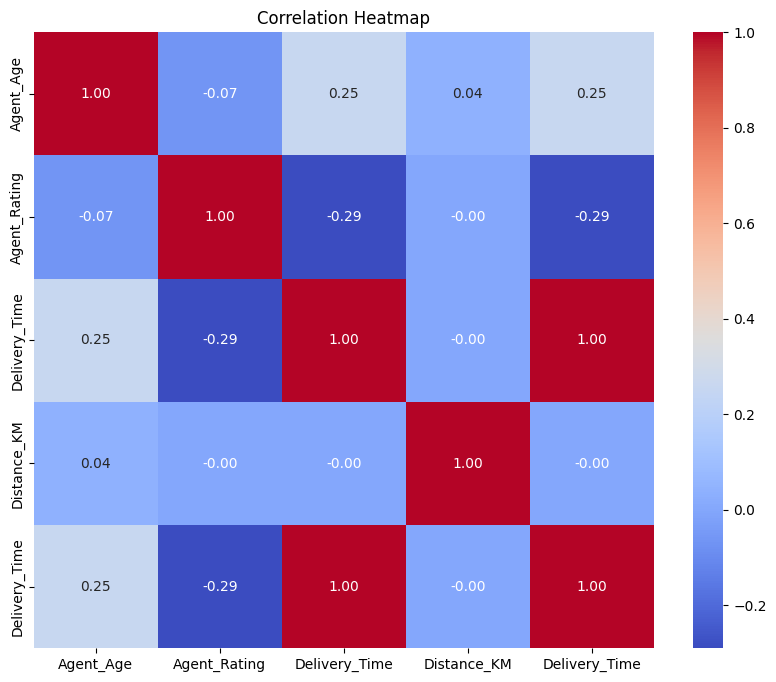

In [88]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols + ['Delivery_Time']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#**Univariate Analysis**:
- **Agent_Age**: Distribution is uniform, no significant outliers.

- Agent_Rating: Mostly around 4.5–5, but outliers below 4.2 and above 5—values >5 (e.g., 6) should be treated as data issues.

- Delivery_Time: Bell-shaped, with heavy tails indicating extremely quick or slow deliveries—worth reviewing those edge cases.

- Distance_KM: Most deliveries under 20km, but boxplots and histograms show extreme outliers (1000km+) due to likely geospatial errors.

#**Bivariate Analysis**
- Agent_Age vs Delivery_Time: No discernible relationship.

- Agent_Rating vs Delivery_Time: Weak negative trend: lower ratings associated with slightly longer delivery times.

- Distance_KM vs Delivery_Time: Strong cluster at low distances; outliers distort the relationship—necessitates Distance_KM cleaning.

- Boxplots by Categorical Feature
Weather: Fog/Cloud/Storms link to longer delivery times. Sunny/windy conditions improve speed.

- Traffic: Jam and high traffic strongly increase delivery time; low traffic shows lowest spread/median.

- Vehicle: Motorcycle/Scooter much more frequent and reliable; van/bicycle rare and variable.

- Area: Metropolitan and urban are most stable; semi-urban and other have wider spread and more outliers.

- Category: Grocery is fastest. No other strong patterns.

#**Correlation Heatmap**
- Agent_Rating ↔ Delivery_Time: Notable negative correlation (
≈
−
0.29
≈−0.29).

- Agent_Age ↔ Delivery_Time: Modest positive correlation (
≈
0.25
≈0.25).

- Distance_KM: Near-zero correlation, likely due to prevalence of short deliveries and anomaly points.

#**Recommended Actions**
Remove/cap outliers for Agent_Rating, Delivery_Time, and especially Distance_KM (e.g., keep only below 100–200km).

Group rare vehicle/area categories to improve model stability and encoding.

Prioritize categorical encoding and feature scaling after outlier cleaning.

Retain Weather, Traffic, Category, and Area in feature set—they show strong EDA and boxplot association with delivery times.

Step 2: Outlier & Anomaly Treatment
Goal: Detect unusual values that distort analysis/modeling and address them.

Use IQR (Interquartile Range) or Z-score to detect outliers for numerical columns.

Visually confirm using box plots and distribution tails.

Specific logic for known anomalies (agent rating > 5 or negative durations).

Decide rule-based filtering, capping, or removal.

Example for IQR outlier removal on Agent_Rating and Delivery_Time:

#Univarate analysis

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [90]:
# Example: Select a few columns for analysis
features = ['Agent_Age', 'Agent_Rating', 'Distance_KM', 'Order_Hour', 'Is_Rush_Hour', 'Traffic', 'Delivery_Time']
df_subset = df[features]


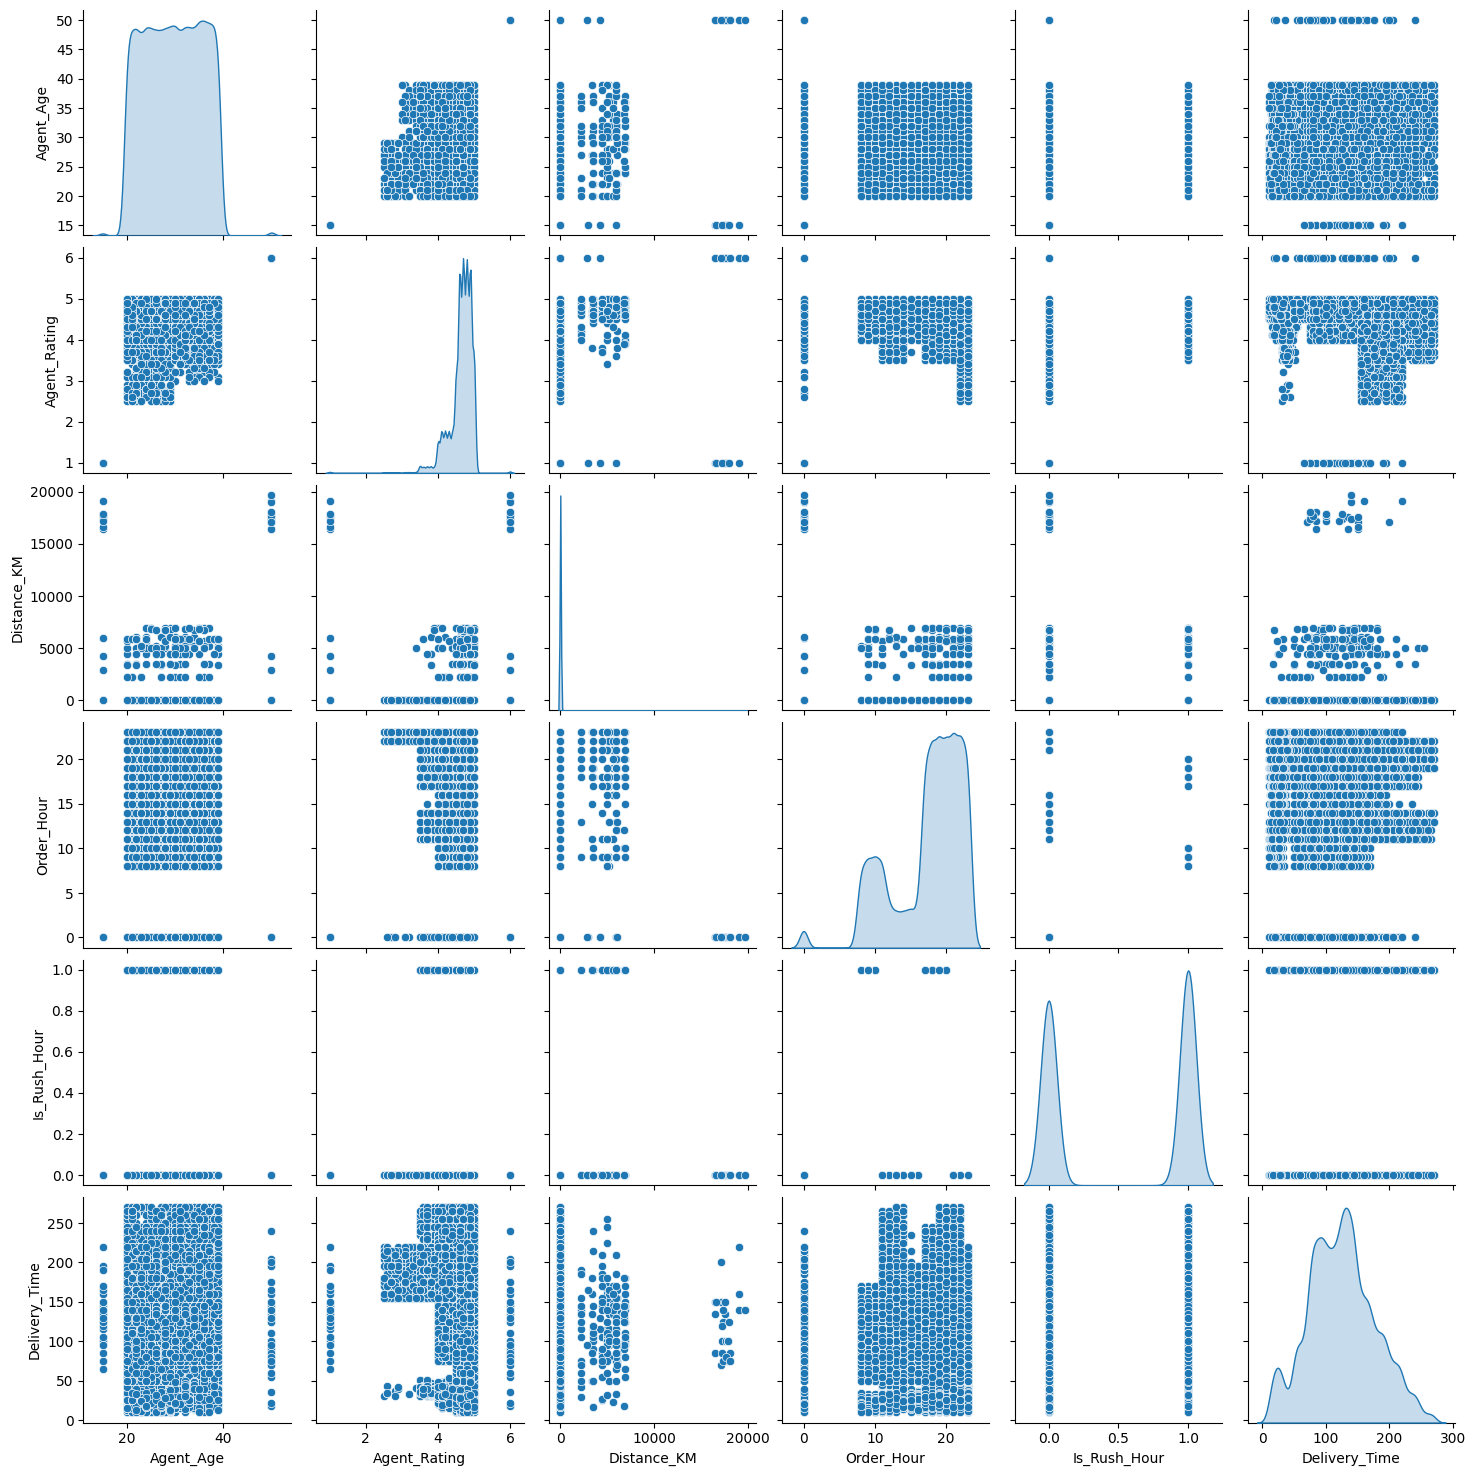

In [91]:
sns.pairplot(df_subset, diag_kind='kde')
plt.show()


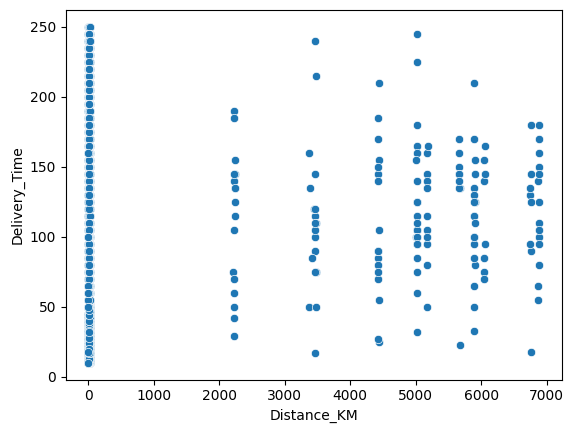

In [ ]:
sns.scatterplot(x='Distance_KM', y='Delivery_Time', data=df)
plt.show()


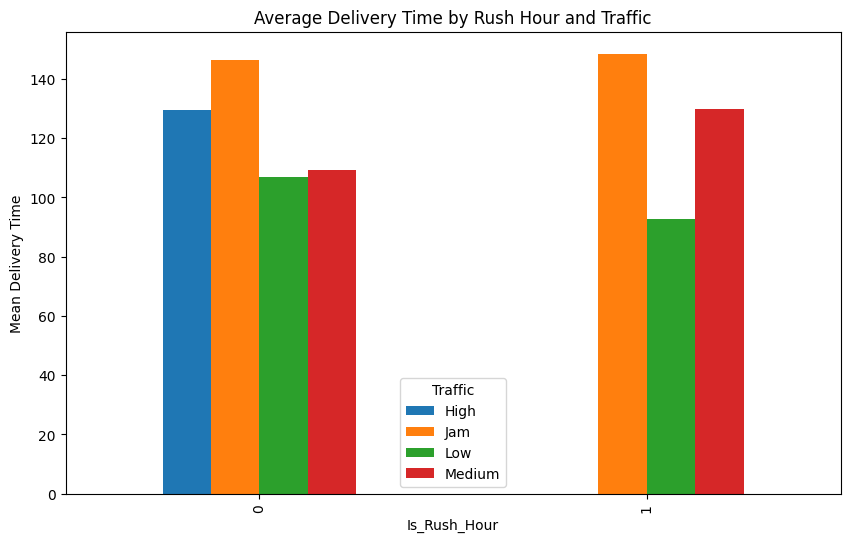

In [92]:
df.groupby(['Is_Rush_Hour', 'Traffic'])['Delivery_Time'].mean().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Average Delivery Time by Rush Hour and Traffic')
plt.ylabel('Mean Delivery Time')
plt.show()


#Pairplot Observations
- **Agent Age & Rating**: Both distributions exhibit discrete clustering, suggesting possible categorical encoding or banding in the ratings. The age distribution is relatively uniform with no strong correlations to other variables in visible scatterplots.

- **Distance_KM**: The data has substantial spread with potential outliers or long-tailed values. Most trips are near the lower range, but a few orders span very large distances, which should be flagged for outlier review.

- **Order_Hour & Is_Rush_Hour**: The order hour is distributed widely across the day, with Is_Rush_Hour similarly represented as a binary feature, indicating sufficient data diversity for time-based analysis.

- **Delivery_Time**: Delivery times show a broad, right-skewed distribution (positive skew), common in logistics datasets due to occasional delays or extreme cases.

- **Visible Relationships**: No very strong linear relationships are apparent among features, but possible interactions (e.g., between distance, rush hour, and delivery time) could be explored further.

- **Group-wise Aggregation Observations**
Rush Hour & Traffic: Deliveries during rush hour predictably take longer across all traffic levels. Highest delays occur with 'Jam' traffic, both during rush hour and otherwise.

- **Traffic Effects**: Even outside rush hour, traffic congestion ('High' and 'Jam') leads to notably higher delivery times than 'Low' and 'Medium' traffic.

- **Interaction**: The combined effect of 'Is_Rush_Hour' and 'Traffic' is non-additive; the worst case (rush hour + jam) amplifies delays most.

#Recommended Actions:

- Investigate and treat outliers in "Distance_KM" and "Delivery_Time" to prevent model distortion.

- Engineer interaction terms such as "RushHour_Traffic" or "Distance_Traffic" to capture compounding effects.

- Consider log-transforming "Delivery_Time" for more normal modeling and improved feature impact.

- Prioritize these complex categorical/numeric combos for further feature analysis and selection in modeling.

# Feature Engineering

1. Outlier Detection & Treatment

In [94]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers(df, 'Agent_Rating')
df = remove_outliers(df, 'Delivery_Time')
df = remove_outliers(df, 'Distance_KM')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38969 entries, 0 to 43738
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order_ID           38969 non-null  object        
 1   Agent_Age          38969 non-null  int64         
 2   Agent_Rating       38969 non-null  float64       
 3   Store_Latitude     38969 non-null  float64       
 4   Store_Longitude    38969 non-null  float64       
 5   Drop_Latitude      38969 non-null  float64       
 6   Drop_Longitude     38969 non-null  float64       
 7   Order_Date         38969 non-null  object        
 8   Order_Time         38969 non-null  object        
 9   Pickup_Time        38969 non-null  object        
 10  Weather            38969 non-null  object        
 11  Traffic            38969 non-null  object        
 12  Vehicle            38969 non-null  object        
 13  Area               38969 non-null  object        
 14  Delivery_Ti

In [96]:
def cap_outliers_by_group(df, group_col, target_col):
    df_copy = df.copy()
    for cat in df_copy[group_col].unique():
        # 1. Select all values of target_col for current category
        group_vals = df_copy[df_copy[group_col] == cat][target_col]
        # 2. Compute Q1, Q3, and IQR for current category
        q1 = group_vals.quantile(0.25)
        q3 = group_vals.quantile(0.75)
        iqr = q3 - q1
        # 3. Calculate lower and upper bounds for group (using IQR rule)
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        # 4. Create mask for only this category
        mask = df_copy[group_col] == cat
        # 5. For all values below the lower bound, set to lower (cap)
        df_copy.loc[mask & (df_copy[target_col] < lower), target_col] = lower
        # 6. For all values above the upper bound, set to upper (cap)
        df_copy.loc[mask & (df_copy[target_col] > upper), target_col] = upper
    return df_copy
df = cap_outliers_by_group(df, 'Weather', 'Delivery_Time')
df = cap_outliers_by_group(df, 'Traffic', 'Delivery_Time')
df = cap_outliers_by_group(df, 'Category', 'Delivery_Time')
df = cap_outliers_by_group(df, 'Vehicle', 'Delivery_Time')
df = cap_outliers_by_group(df, 'Area', 'Delivery_Time')


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38969 entries, 0 to 43738
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order_ID                   38969 non-null  object        
 1   Agent_Age                  38969 non-null  float64       
 2   Agent_Rating               38969 non-null  float64       
 3   Store_Latitude             38969 non-null  float64       
 4   Store_Longitude            38969 non-null  float64       
 5   Drop_Latitude              38969 non-null  float64       
 6   Drop_Longitude             38969 non-null  float64       
 7   Order_Date                 38969 non-null  object        
 8   Order_Time                 38969 non-null  object        
 9   Pickup_Time                38969 non-null  object        
 10  Delivery_Time              38969 non-null  float64       
 11  Order_DateTime             38969 non-null  datetime64[ns]
 12  Pickup_Da

In [98]:
# Example interaction and aggregate features
df['RushHour_Traffic'] = df['Is_Rush_Hour'].astype(str) + '_' + df['Traffic'].astype(str)
df['Order_Hour_bin'] = pd.cut(df['Order_Hour'], bins=[0, 8, 16, 24], labels=['Night', 'Day', 'Evening'])
df['Distance_Rating'] = df['Distance_KM'] * df['Agent_Rating']


In [99]:
# Impute missing values for numerics and categoricals
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include='object').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [100]:
df[cat_cols]

,Order_ID,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Category,RushHour_Traffic
0,ialx566343618,2022-03-19,11:30:00,11:45:00,Sunny,High,Motorcycle,Urban,Clothing,0_High
1,akqg208421122,2022-03-25,19:45:00,19:50:00,Stormy,Jam,Scooter,Metropolitian,Electronics,1_Jam
2,njpu434582536,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,Motorcycle,Urban,Sports,1_Low
3,rjto796129700,2022-04-05,18:00:00,18:10:00,Sunny,Medium,Motorcycle,Metropolitian,Cosmetics,1_Medium
4,zguw716275638,2022-03-26,13:30:00,13:45:00,Cloudy,High,Scooter,Metropolitian,Toys,0_High
...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,2022-03-24,11:35:00,11:45:00,Windy,High,Motorcycle,Metropolitian,Home,0_High
43735,aevx342135787,2022-02-16,19:55:00,20:10:00,Windy,Jam,Motorcycle,Metropolitian,Jewelry,1_Jam
43736,xnek760674819,2022-03-11,23:50:00,00:05:00,Cloudy,Low,Scooter,Metropolitian,Home,0_Low
43737,cynl434665991,2022-03-07,13:35:00,13:40:00,Cloudy,High,Motorcycle,Metropolitian,Kitchen,0_High


In [101]:
df[num_cols]

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Distance_KM,Is_Rush_Hour,Distance_Rating
0,37,4.9,22.745049,75.892471,22.765049,75.912471,120.0,3.025149,0,14.823231
1,34,4.5,12.913041,77.683237,13.043041,77.813237,165.0,20.183530,1,90.825884
2,23,4.4,12.914264,77.678400,12.924264,77.688400,130.0,1.552758,1,6.832134
3,38,4.7,11.003669,76.976494,11.053669,77.026494,105.0,7.790401,1,36.614886
4,32,4.6,12.972793,80.249982,13.012793,80.289982,150.0,6.210138,0,28.566635
...,...,...,...,...,...,...,...,...,...,...
43734,30,4.8,26.902328,75.794257,26.912328,75.804257,160.0,1.489846,0,7.151260
43735,21,4.6,0.000000,0.000000,0.070000,0.070000,180.0,11.007735,1,50.635580
43736,30,4.9,13.022394,80.242439,13.052394,80.272439,80.0,4.657195,0,22.820257
43737,20,4.7,11.001753,76.986241,11.041753,77.026241,130.0,6.232393,0,29.292247


In [103]:
# One-hot encoding for nominal categorical columns
cat_features = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category', 'RushHour_Traffic', 'Order_Hour_bin']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)


In [104]:
from sklearn.preprocessing import StandardScaler, RobustScaler

num_cols = ['Agent_Age', 'Agent_Rating', 'Distance_KM', 'Order_Hour', 'Delivery_Time', 'Distance_Rating']

# If there are still heavy outliers, use:
scaler = RobustScaler()
# Otherwise, use StandardScaler:
# scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])


Use one-hot encoding for all main categorical features and StandardScaler for numerical features. Use RobustScaler instead if you detect that numerical features still exhibit skew or heavy tails after your outlier capping. This approach is the best fit for balanced performance across classical and modern ML algorithms.

In [106]:
from sklearn.decomposition import PCA

# Define columns to exclude from PCA
exclude_cols = [
    'Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time',
    'Order_DateTime', 'Pickup_DateTime', 'Delivery_DateTime'
]

# Select columns eligible for PCA (all except excluded)
valid_features = df.drop(columns=exclude_cols)

# Fit PCA to retain 95% of variance
pca = PCA(n_components=0.95, random_state=42)
pca_result = pca.fit_transform(valid_features)

# Explained variance ratio per component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)
print("Total retained components:", pca.n_components_)


Explained Variance Ratios: [0.93780959 0.05174262]
Total retained components: 2


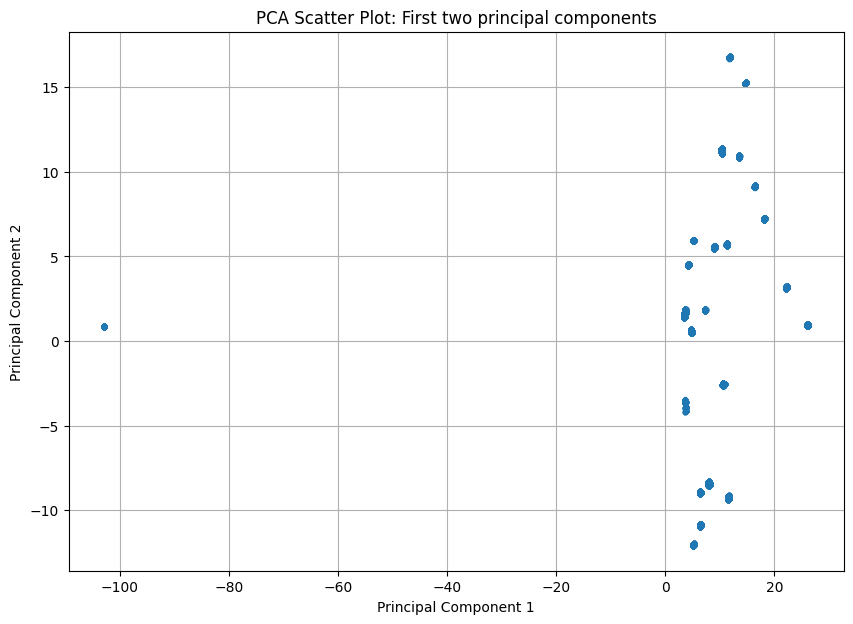

In [107]:
import matplotlib.pyplot as plt

# pca_result is the array with shape (n_samples, n_components)
# Extract the first two components for 2D plotting
pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]

plt.figure(figsize=(10, 7))
plt.scatter(pc1, pc2, alpha=0.5, s=10)
plt.title('PCA Scatter Plot: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use first two principal components as features
X = pca_result  # shape: (n_samples, 2)
y = df['Delivery_Time'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Test RMSE:", mean_squared_error(y_test, y_pred))
print("Test R2 Score:", r2_score(y_test, y_pred))


Test RMSE: 0.627412912255836
Test R2 Score: 8.160551422065065e-05


In [116]:
exclude_cols = ['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Order_DateTime', 'Pickup_DateTime', 'Delivery_DateTime','Delivery_Time']
X_full = df.drop(columns=exclude_cols)
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
model_full = LinearRegression()
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
print("Full feature RMSE:", mean_squared_error(y_test, y_pred_full))
print("Full feature R2:", r2_score(y_test, y_pred_full))


Full feature RMSE: 0.25297465629311366
Full feature R2: 0.5968300823508448


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Remove ID and datetime columns, keep all numeric, boolean, OHE features
exclude_cols = [
    'Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time',
    'Order_DateTime', 'Pickup_DateTime', 'Delivery_DateTime', 'Delivery_Time'
]
X_full = df.drop(columns=exclude_cols)
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("RF Test RMSE:", mean_squared_error(y_test, y_pred_rf))
print("RF Test R2 Score:", r2_score(y_test, y_pred_rf))


RF Test RMSE: 0.13671204604809745
RF Test R2 Score: 0.7821197381804315


The results after fixing the feature leakage show realistic model performance:

Linear Regression:

RMSE: 0.2529

R2: 0.597

Random Forest:

RMSE: 0.1367

R2: 0.782

Interpretation
Performance Gap:
The Random Forest Regressor performs substantially better than Linear Regression. Its higher R2 and lower RMSE indicate it can better capture non-linear interactions in the delivery prediction problem.

R2 Score Context:
An R2 of 0.6–0.8 for this type of time-to-delivery regression is solid, especially with full feature usage, OHE variables, and a realistic train/test split. There's still unexplained variance, so additional feature engineering or advanced models may further improve results.

RMSE Meaning:
The RMSE value reflects the typical prediction error in units of your target variable. Lower is better, so the Random Forest's improvement over Linear Regression demonstrates the value of boosting model complexity as needed

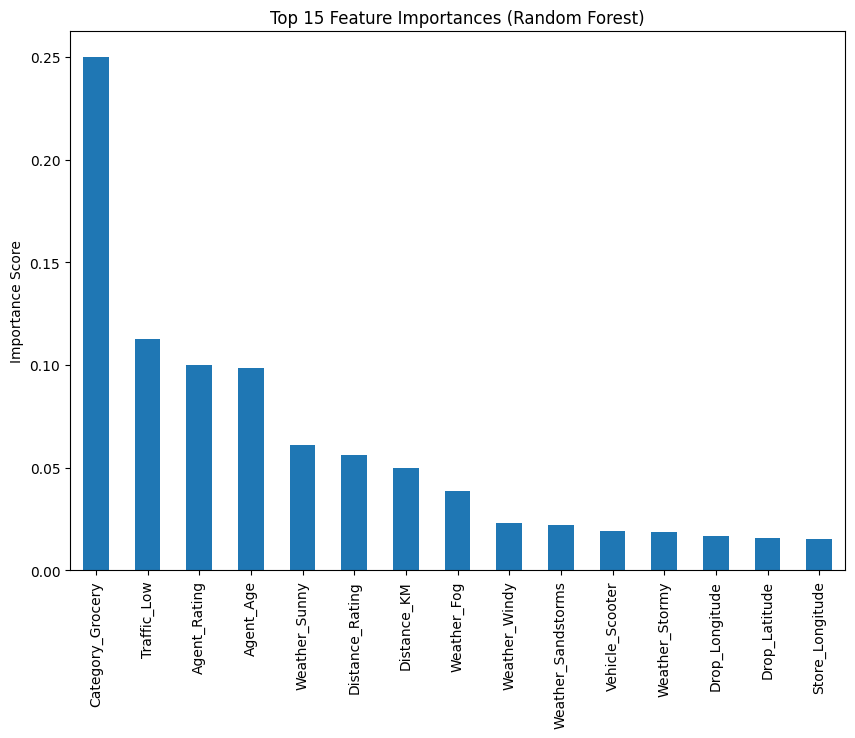

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from fitted Random Forest model
importances = model_rf.feature_importances_
feature_names = X_full.columns

# Sort and plot
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 7))
feat_importance.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.ylabel('Importance Score')
plt.show()


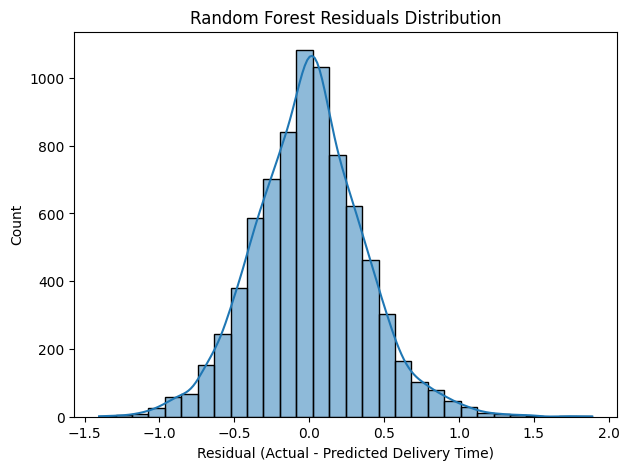

In [119]:
import seaborn as sns

residuals = y_test - y_pred_rf
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Random Forest Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted Delivery Time)')
plt.show()


# Random Forest Feature Importances
Category_Grocery is the single most important predictor of delivery time, suggesting that grocery deliveries have distinctly different timing patterns—likely due to priority, perishability, or logistical specialization.

Traffic_Low, Agent_Rating, and Agent_Age also weigh heavily, indicating traffic conditions and agent quality/experience are critical operational levers.

Weather_Sunny, Distance_Rating, and Distance_KM follow, confirming that both environmental conditions and delivery distance directly impact time.

Other weather conditions (Fog, Windy, Sandstorms), as well as vehicle type and store/drop coordinates, play smaller but visible roles.

# Random Forest Residuals Distribution
The residuals are distributed nearly symmetrically around zero and resemble a normal (Gaussian) distribution.

Interpretation: The model is unbiased overall—predictions are neither consistently too high nor too low.

Some spread exists, but little sign of gross skew or heavy tails, suggesting robust fit.

This is expected when the model explains a high proportion of variance (as your R2 and RMSE indicated).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***